# Credit Card Fraud Detection

# 1. Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Classifier Metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score


# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
df = pd.read_csv('BankCrediTCard.csv')
df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [4]:
df.isna().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [5]:
# We inspect the data as a whole|
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Credit_Amount,30000.0,192917.322667,132288.752980,20000.0,50000.00,220000.0,270000.00,2000000.0
Gender,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
Academic_Qualification,30000.0,1.855933,0.794397,1.0,1.00,2.0,2.00,6.0
Marital,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
Age_Years,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
Repayment_Status_Jan,30000.0,0.355200,0.746984,0.0,0.00,0.0,0.00,6.0
Repayment_Status_Feb,30000.0,0.319300,0.796012,0.0,0.00,0.0,0.00,6.0
Repayment_Status_March,30000.0,0.302967,0.781792,0.0,0.00,0.0,0.00,6.0
Repayment_Status_April,30000.0,0.256700,0.743880,0.0,0.00,0.0,0.00,6.0


# 2. Data Cleaning

#####  We see from the above that there is data that needs to be cleaned. I.e. Acadmeic Qualification column.

### 2.1 Academic Qualification Column

In [6]:
print('Academic Qualification Column Values: ', df['Academic_Qualification'].unique())

Academic Qualification Column Values:  [2 1 3 5 4 6]


In [5]:
# There exist value 6 in this column.
# Since this is unknown (undefined), that can be grouped into the category 5: "Others"

df['Academic_Qualification'] = df['Academic_Qualification'].apply(lambda edu_value: edu_value 
                                        if (edu_value < 5) 
                                        else 5) # Changes every value of x not within (and inclusive of) 1 ~ 3 to 4  

# Corrected changes
df['Academic_Qualification'].unique()

array([2, 1, 3, 5, 4], dtype=int64)

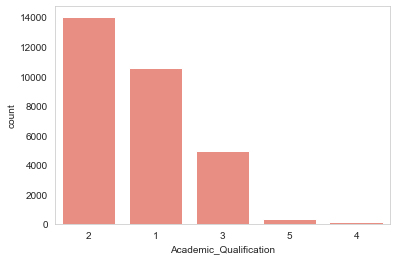

In [6]:
# Being fancy again
fig, ax = plt.subplots()
sns.countplot(data=df,x='Academic_Qualification', order = df['Academic_Qualification'].value_counts().index, color='salmon');
# df['EDUCATION'].value_counts().plot(kind='bar', );

### 2.2 Marital Column

##### We see from .describe() that there are some discrepancies in the Marital column

In [7]:
print("Marriage Column Values: ", df['Marital'].unique())

Marriage Column Values:  [1 2 3 0]


In [9]:
# There exists 0 in this column
# Since this is unknown (undefined), similar to Academic Qualification, they can be grouped into 3: "Do not prefer to say"

df['Marital'] = df['Marital'].apply(lambda marriage_value: marriage_value
                                     if (marriage_value > 0 and marriage_value < 3)
                                     else 3) # changes every value of x not within (and inclusive of) 1 and 2 to 3

# Corrected changes
df['Marital'].unique()

array([1, 2, 3], dtype=int64)

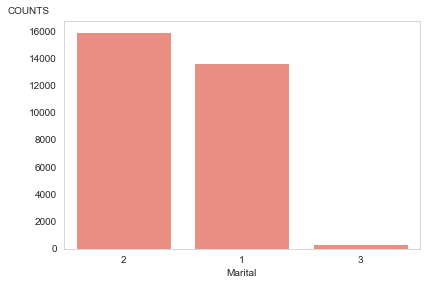

In [10]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='Marital', order = df['Marital'].value_counts().index, color='salmon')
ax.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax.yaxis.set_label_coords(-0.1,1.02)

plt.tight_layout()
plt.show();

# 3. EDA

### 3.1 Target variable mapping

In [11]:
print(df['Default_Payment'].value_counts(),'\n')


0    23364
1     6636
Name: Default_Payment, dtype: int64 



### 3.2 Categorical variables EDA

In [12]:
df.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [13]:
# Creating a new dataframe with just the categorical explanatory variables
df_categorical = df[['Gender', 'Academic_Qualification', 'Marital', 'Repayment_Status_Jan', 'Repayment_Status_Feb', 'Repayment_Status_March', 'Repayment_Status_April', 'Repayment_Status_May', 'Repayment_Status_June'
                     ,'Default_Payment']]

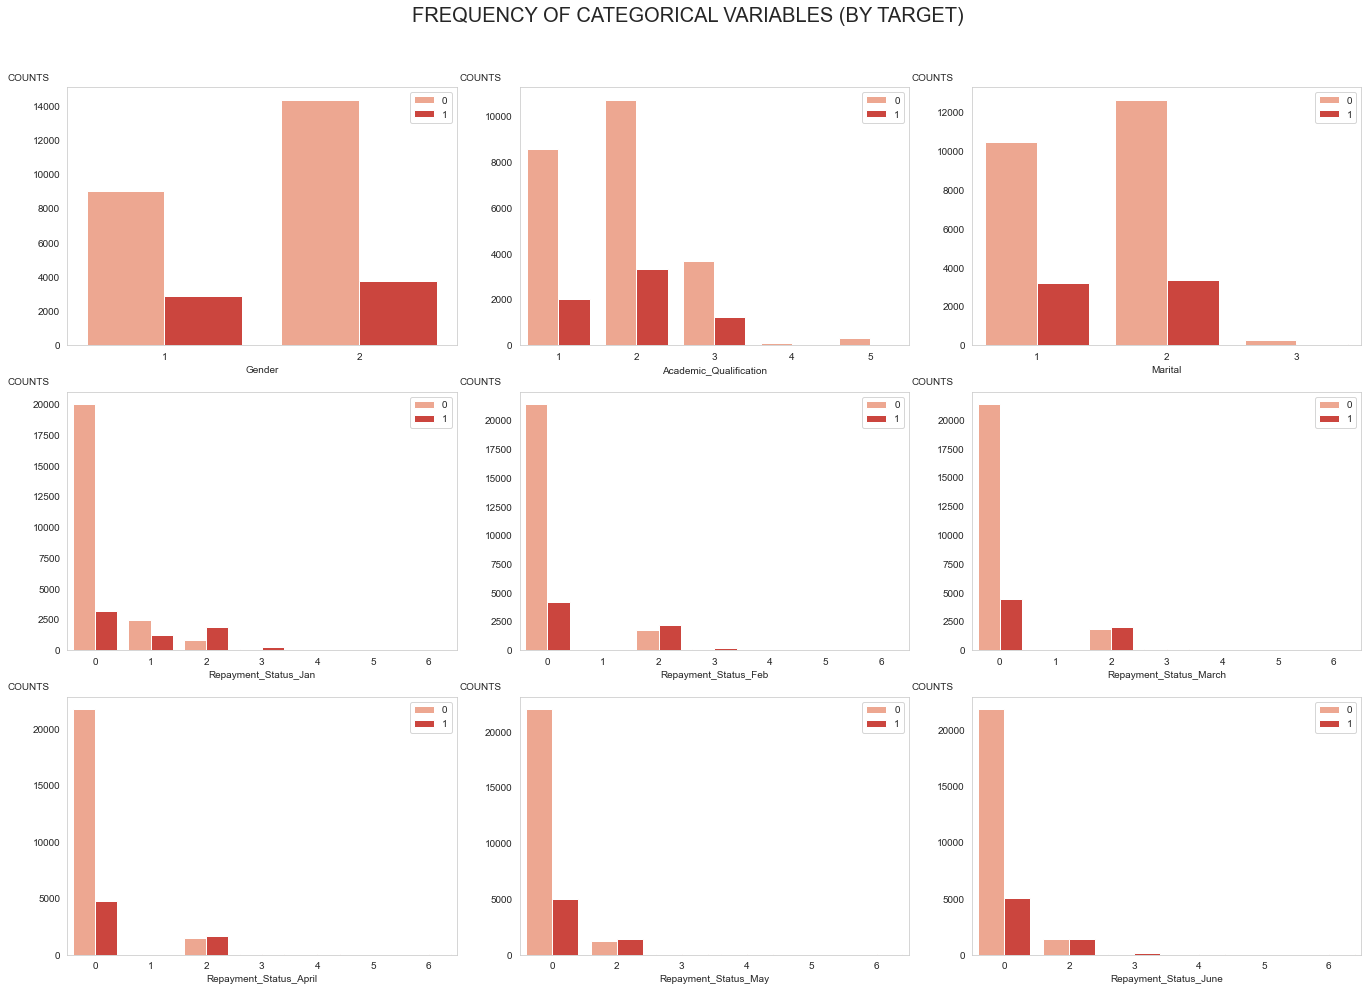

In [14]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='Gender', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='Academic_Qualification', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='Marital', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='Repayment_Status_Jan', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='Repayment_Status_Feb', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='Repayment_Status_March', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[1,2])
ax7 = sns.countplot(x='Repayment_Status_April', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[2,0])
ax8 = sns.countplot(x='Repayment_Status_May', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[2,1])
ax9 = sns.countplot(x='Repayment_Status_June', hue = 'Default_Payment', data=df_categorical, palette='Reds', ax=axes[2,2])

# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax7.legend(loc="upper right")
ax8.legend(loc="upper right")
ax9.legend(loc="upper right")

# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


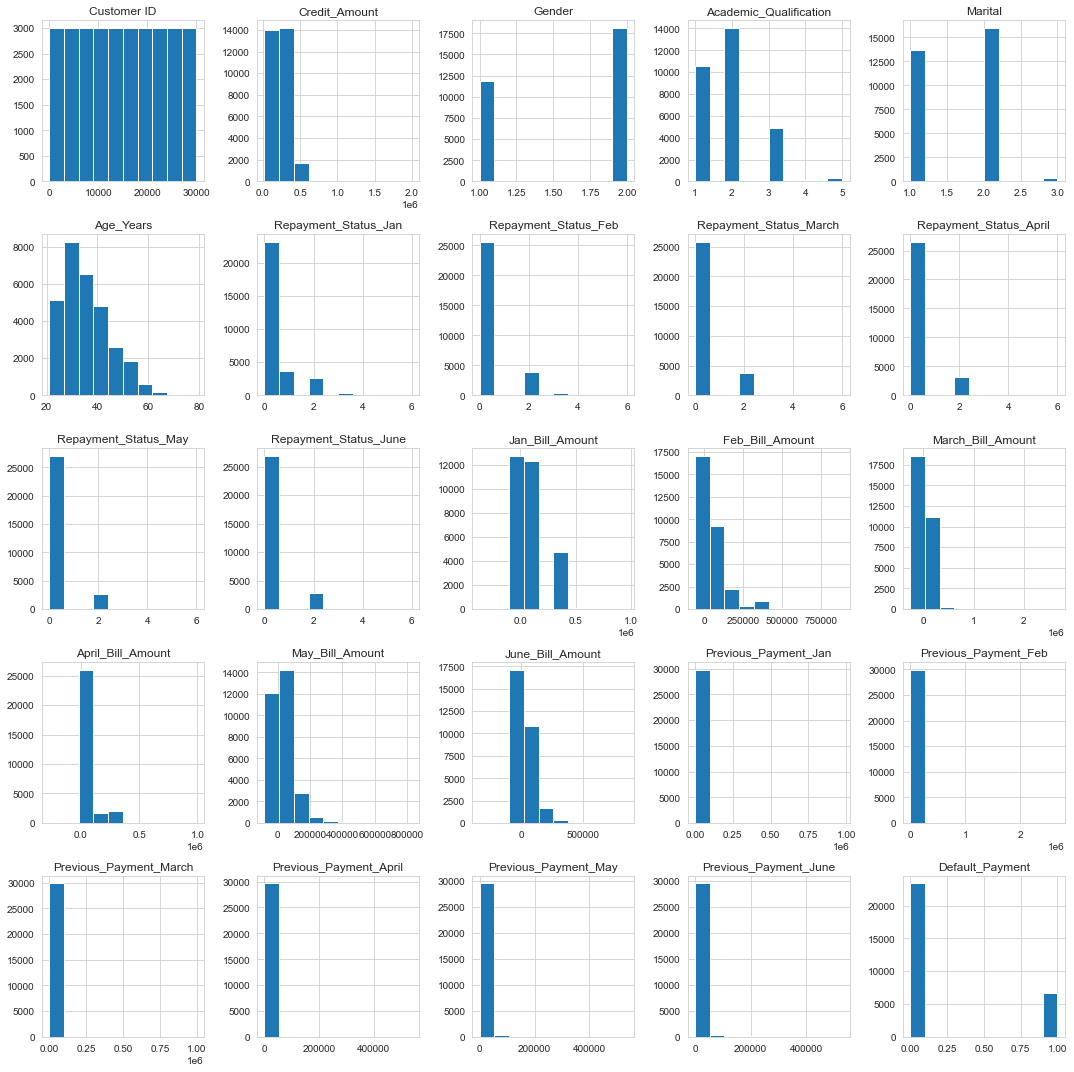

In [15]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

# 4. Feature Selection

### 4.1 Correlation

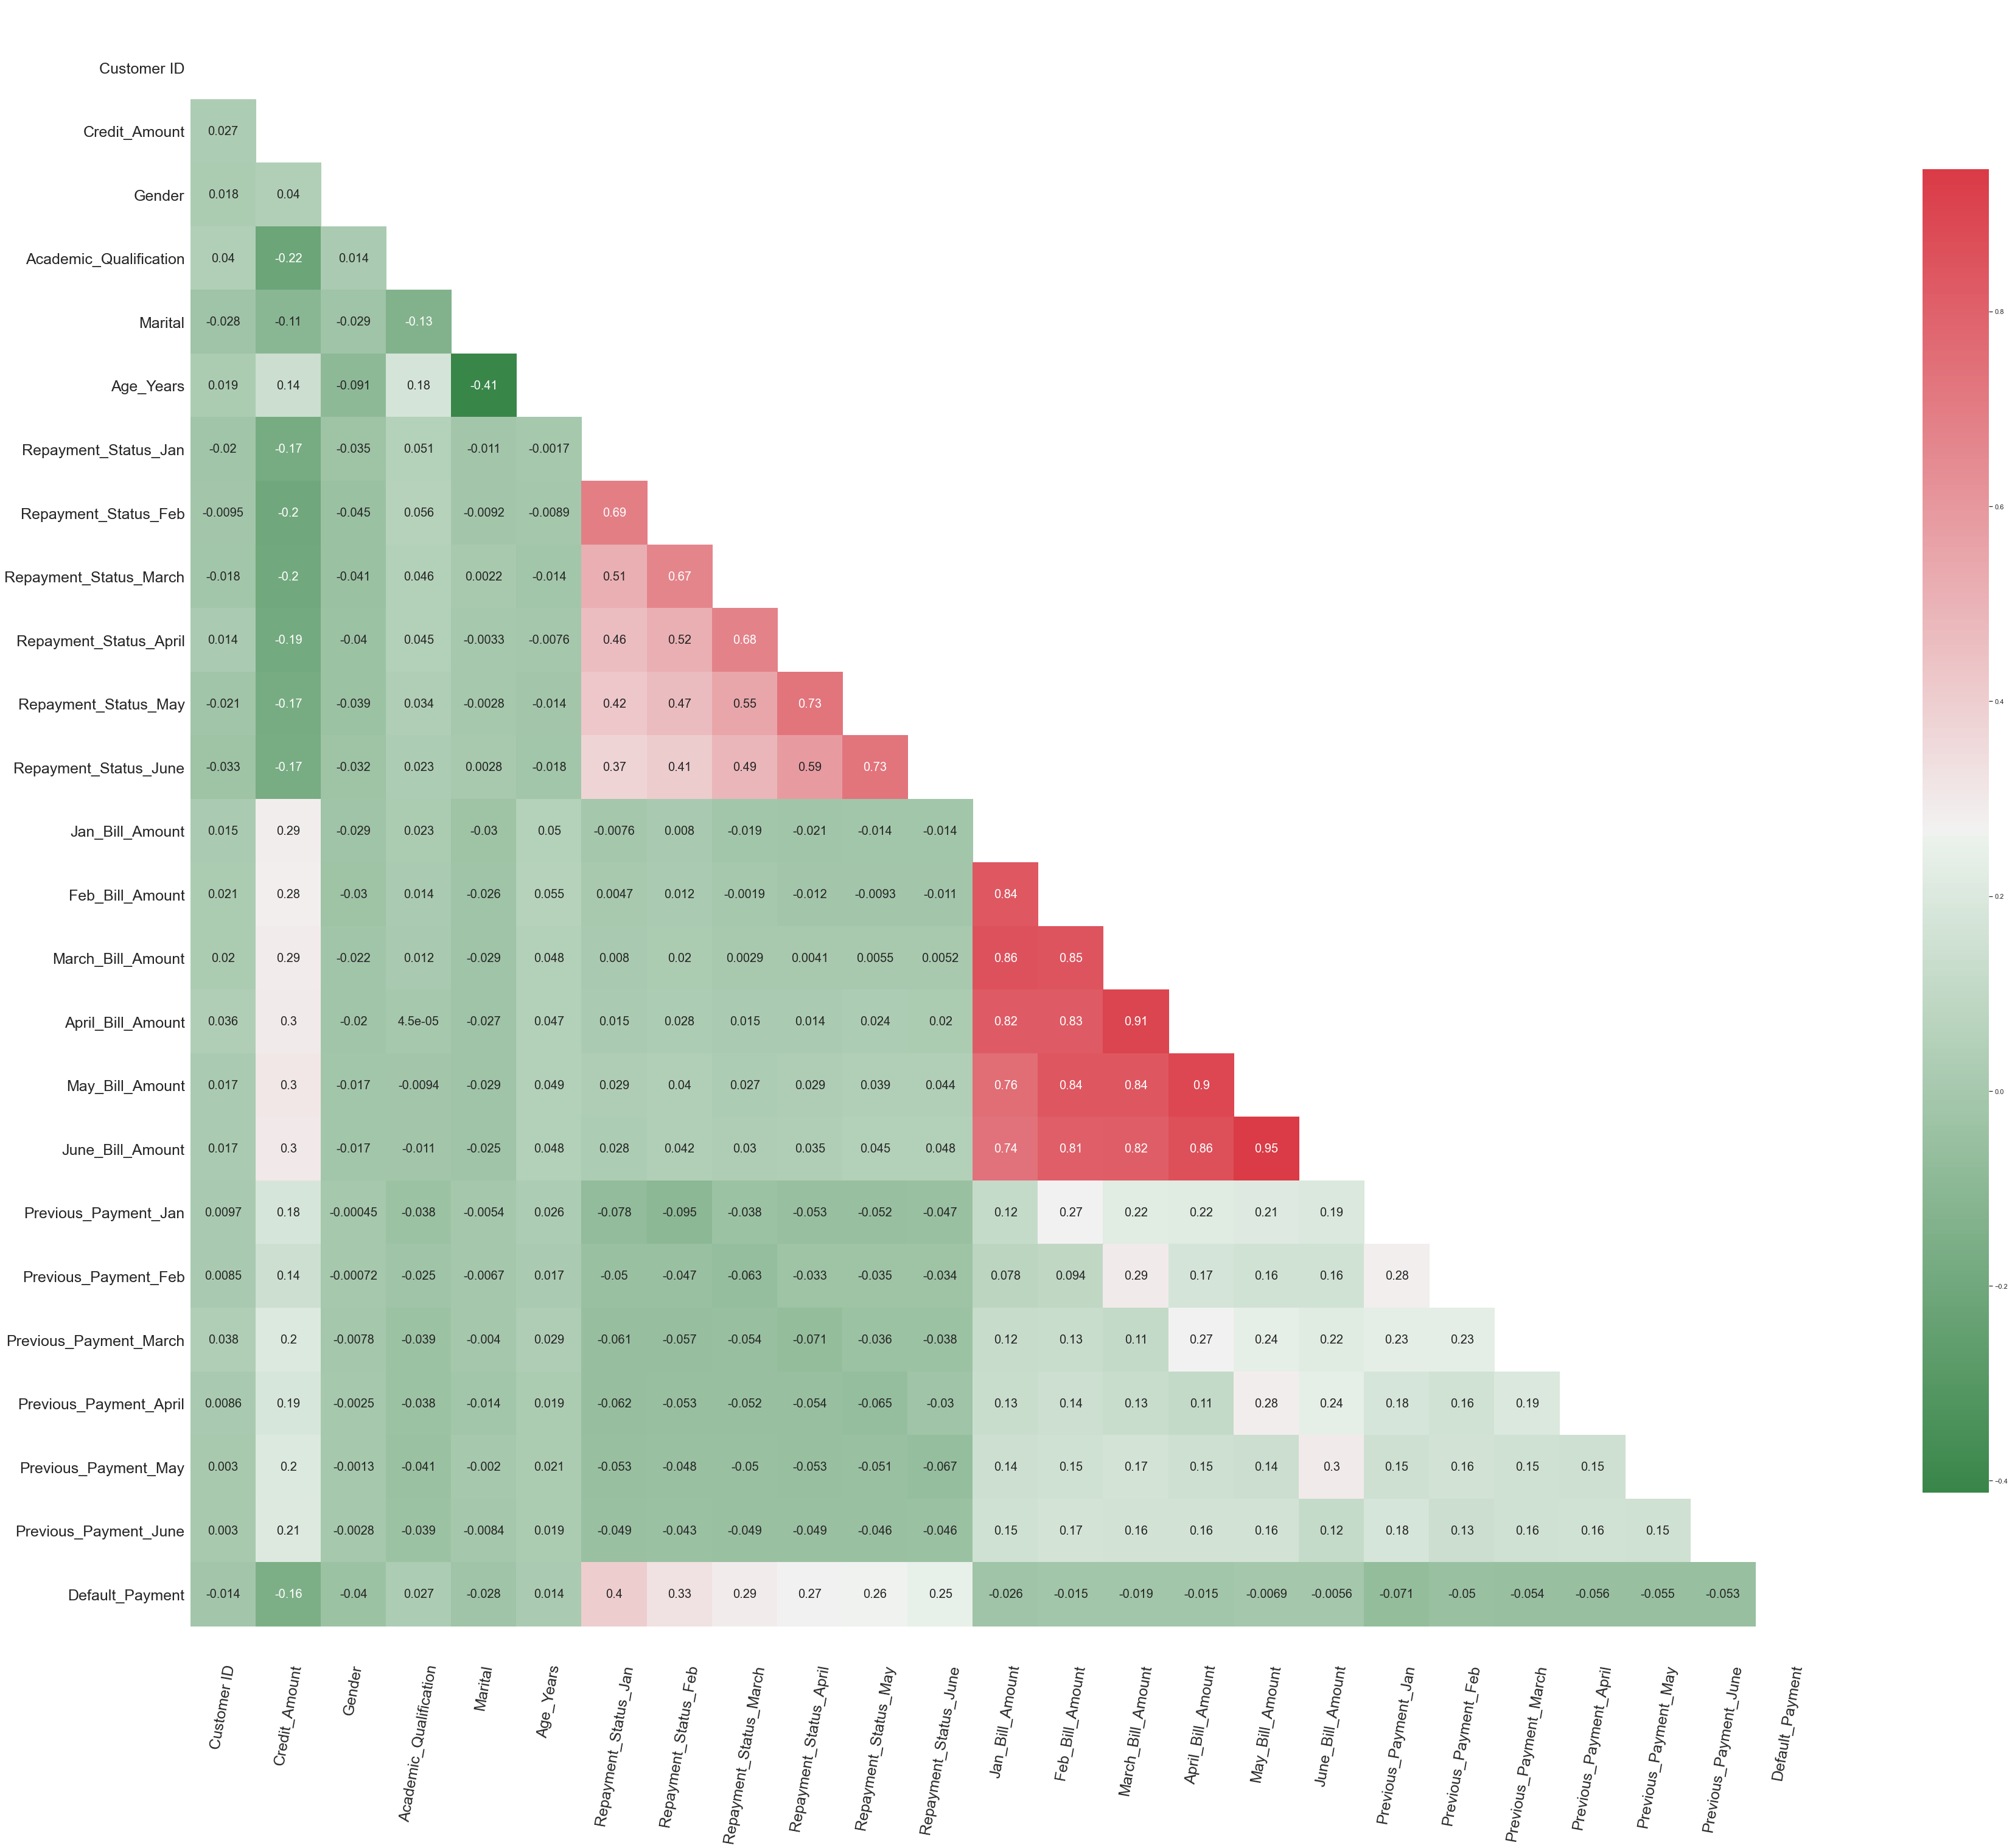

In [16]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

plt.savefig('correlation_heatmap.png', transparent = True)

In [17]:
df.drop('Customer ID', inplace=True, axis=1)

# 5. Train Test Split

In [18]:
X = df.drop('Default_Payment', axis=1)
y = df['Default_Payment']

### 5.1 Split data for training, validation and testing

In [19]:
# Data splitting for 80% Train/Val and 20% Test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=69) # 20% holdout 

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=69) # Train/Val


#### Standard scale

In [20]:
# Initializing the scaler  (Just scale every single time lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train_val.values)

## Scale the Predictors on the train/val dataset
X_train_val_scaled = std.transform(X_train_val.values)

In [21]:
# This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X_train_val_scaled, y_train_val) 



RandomForestClassifier()

#### feature importance

<AxesSubplot:>

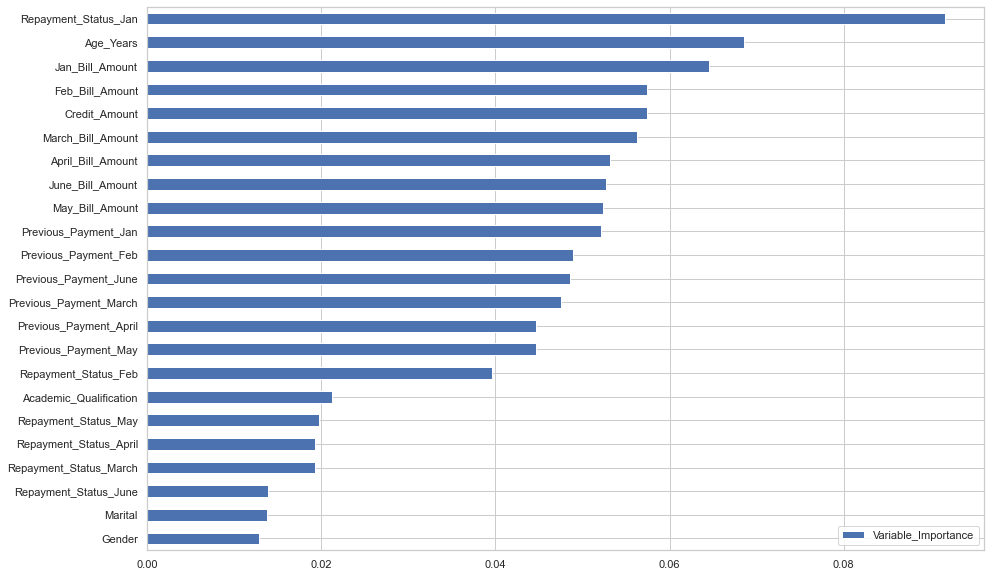

In [22]:
# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)

# Set seaborn contexts 
sns.set(style="whitegrid")

feature_importance.plot.barh(figsize=(15,10))

# 6. Model building

### Steps
   - creating a model
   - standarding scaling
   - cross validation
   - confusion matrix 
 

In [23]:
# to give model baseline report with cross-validation in dataframe 
def baseline_report_cv_(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Splitting the data into 80% training/validation data and 20% testing data
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    
#     # Splitting the training data into 60% training data and 20% validation data.
#     X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
     
    
    # Creating a shuffled kfold of 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    
    accuracy     = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


## Scaled Dataset Model performance evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\sidhi\appdata\local\programs\pytho

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.768625,0.478950,0.558217,0.515518,0.747760,0
1,LogisticRegression,0.818083,0.683638,0.327605,0.442679,0.757112,0
2,KNN,0.792875,0.546357,0.360128,0.434009,0.706281,0
3,DecisionTree,0.724000,0.378350,0.396182,0.391424,0.609084,0
4,RandomForest,0.814250,0.644731,0.364597,0.464183,0.758673,0
5,LinearSVC,0.816708,0.683218,0.316283,0.432264,0.757419,0


In [25]:
def make_confusion_matrix(model, X, y, threshold=0.5):
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    model.fit(X_train, y_train)
    
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)  # This line is important
    # Converts your probabilities into True and False
    # model.predict_proba(X_test) print this one out first
    # model.predict_proba(X_test)[:, 1] then this one
    # model.predict_proba(X_test)[:, 1] >= threshold then this one
    
    fraud_confusion = confusion_matrix(y_val, y_predict)
    fig, ax = plt.subplots(dpi=80)    
    g = sns.heatmap(fraud_confusion, cmap=plt.cm.Reds, annot=True, annot_kws={"size":20}, square=True, fmt='d',
                    xticklabels=['No Default', 'Default'],
                    yticklabels=['No Default', 'Default']);

    # Changing the size of the xticks and ytick labels
    ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
    ax.set_xticklabels(g.get_xticklabels(), size=10);
    
#     ax.xaxis.label.set_color('white')
#     ax.tick_params(axis='x', colors='white')
    
#     ax.yaxis.label.set_color('white')
#     ax.tick_params(axis='y', colors='white')
    
    # Changing axis orientation & setting titles
    ax.set_xlabel('Prediction', size=15)
    ax.set_ylabel('Actual', rotation=0, labelpad=40,size=15)
    
    
    # Prevent Heatmap Cut-Off Issue
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


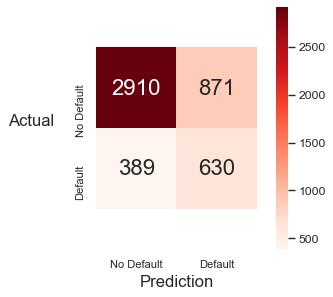

In [26]:
make_confusion_matrix(randomforest, X, y, threshold=0.25)
plt.savefig('RF_confusionMatrix.png', transparent=True)

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


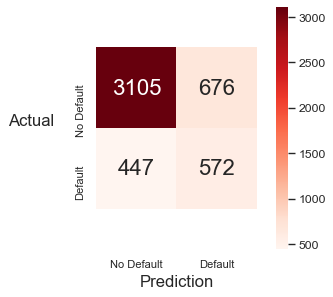

In [27]:
make_confusion_matrix(gnb, X, y, threshold=0.25)
plt.savefig('gnb.png', transparent=True)

c:\users\sidhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


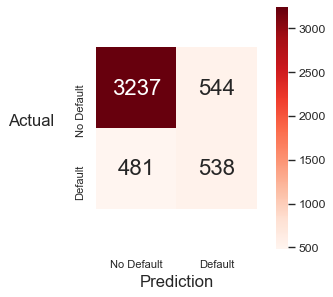

In [30]:
make_confusion_matrix(logit, X, y, threshold=0.25)
plt.savefig('logistic.png', transparent=True)

# 7. Conclusion

In [28]:
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.768625,0.478950,0.558217,0.515518,0.747760,0
1,LogisticRegression,0.818083,0.683638,0.327605,0.442679,0.757112,0
2,KNN,0.792875,0.546357,0.360128,0.434009,0.706281,0
3,DecisionTree,0.724000,0.378350,0.396182,0.391424,0.609084,0
4,RandomForest,0.814250,0.644731,0.364597,0.464183,0.758673,0
5,LinearSVC,0.816708,0.683218,0.316283,0.432264,0.757419,0


##### Models with good recall and f1 - score :

1. GaussianNB
2. Random Forest
3. Logistic Regression
4. SVC